In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [5]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [6]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

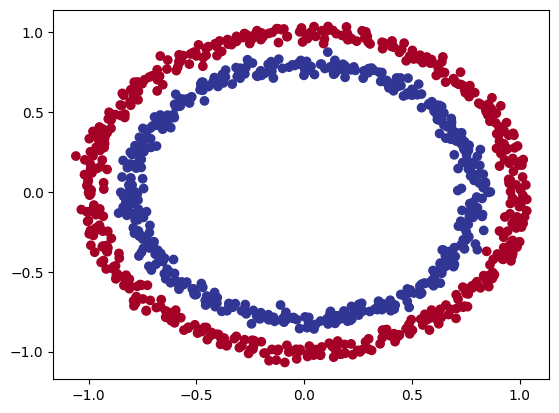

In [7]:
# Visualize, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [10]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [11]:
import torch
torch.__version__

'2.0.1+cu118'

In [12]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [13]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [14]:
type(X), X.dtype

(torch.Tensor, torch.float32)

In [15]:
torch.manual_seed=42

In [16]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 = 20% of data will be test, and 80% will be train
                                                    random_state=42)

In [17]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [18]:
n_samples

1000

In [19]:
# Import PyTorch
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [20]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [21]:
X_train.shape

torch.Size([800, 2])

In [22]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [23]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handliung the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

  # 3. Define a forward method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer 1 -> layer 2 -> output

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [24]:
device

'cuda'

In [25]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [26]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
  nn.Linear(in_features=2, out_features=5),
  nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [27]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3321, -0.5418],
                      [-0.6223,  0.4560],
                      [ 0.1074, -0.5626],
                      [ 0.1533,  0.5120],
                      [ 0.4873, -0.4225]], device='cuda:0')),
             ('0.bias',
              tensor([-0.5452, -0.4332,  0.0889,  0.2876,  0.3386], device='cuda:0')),
             ('1.weight',
              tensor([[-0.4067,  0.3750,  0.3459, -0.1503, -0.3311]], device='cuda:0')),
             ('1.bias', tensor([0.4037], device='cuda:0'))])

In [28]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Lendth of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Lendth of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[ 0.7092],
        [ 0.5798],
        [ 0.6191],
        [ 0.7365],
        [-0.0622],
        [-0.1359],
        [ 0.0398],
        [-0.1295],
        [ 0.6480],
        [ 0.5636]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [29]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [30]:
# Setup the loss function
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function is built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [31]:
# Calculate accuracy - out of 100 examples, what % does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [32]:
# View the first 5 outputs if the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.7092],
        [ 0.5798],
        [ 0.6191],
        [ 0.7365],
        [-0.0622]], device='cuda:0')

In [33]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [34]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.6702],
        [0.6410],
        [0.6500],
        [0.6762],
        [0.4845]], device='cuda:0')

In [35]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 0.], device='cuda:0')

In [36]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [37]:
# torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate loss / accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilities as input
  #                y_train)
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLose expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # Print out what's happenin'
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 53.25% | Test loss: 0.72184, Test acc: 54.00%
Epoch: 10 | Loss: 51.00% | Test loss: 0.70902, Test acc: 55.50%
Epoch: 20 | Loss: 49.88% | Test loss: 0.70270, Test acc: 55.00%
Epoch: 30 | Loss: 50.00% | Test loss: 0.69919, Test acc: 54.50%
Epoch: 40 | Loss: 50.12% | Test loss: 0.69704, Test acc: 52.00%
Epoch: 50 | Loss: 50.25% | Test loss: 0.69562, Test acc: 50.00%
Epoch: 60 | Loss: 50.62% | Test loss: 0.69465, Test acc: 51.00%
Epoch: 70 | Loss: 50.88% | Test loss: 0.69396, Test acc: 50.50%
Epoch: 80 | Loss: 50.38% | Test loss: 0.69347, Test acc: 50.50%
Epoch: 90 | Loss: 50.12% | Test loss: 0.69312, Test acc: 50.00%


In [38]:
loss_fn

BCEWithLogitsLoss()

In [39]:
loss_fn_without_logits = nn.BCELoss()
loss_fn_without_logits

BCELoss()

In [40]:
import requests
from pathlib import Path

# Download helper functions from Learn Pytorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


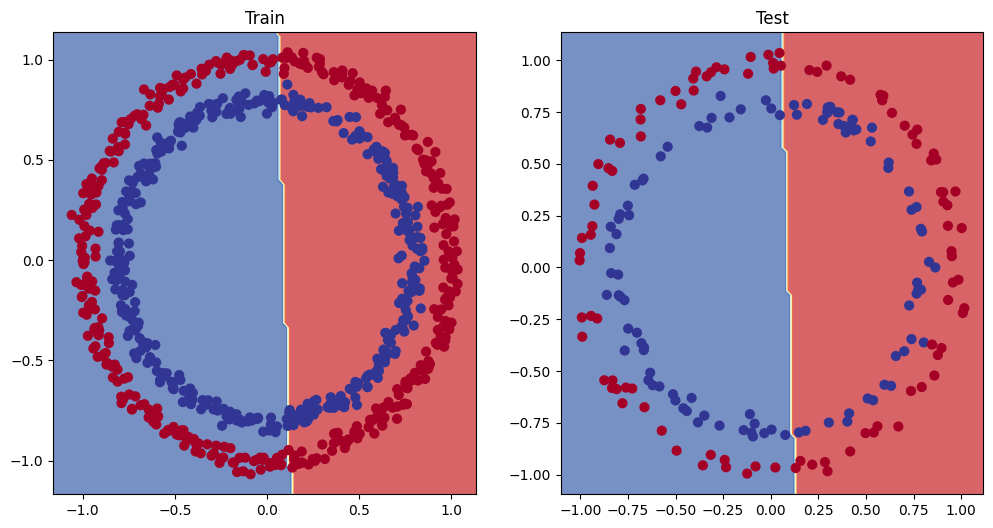

In [41]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [42]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self_layer_1(x)
    # z = self_layer_2(z)
    # z = self_layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speed ups where possible behind the scenes

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [43]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [44]:
# Write a training and evaluation loop for model_1
# torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()
  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probs -> pred labels

  # 2. Calculate the loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.71871, Acc: 50.00% | Test loss: 0.71477, Test acc: 50.00%
Epoch: 100 | Loss: 0.69331, Acc: 47.62% | Test loss: 0.69269, Test acc: 50.50%
Epoch: 200 | Loss: 0.69305, Acc: 49.88% | Test loss: 0.69366, Test acc: 47.50%
Epoch: 300 | Loss: 0.69300, Acc: 50.88% | Test loss: 0.69418, Test acc: 46.00%
Epoch: 400 | Loss: 0.69298, Acc: 51.25% | Test loss: 0.69444, Test acc: 45.50%
Epoch: 500 | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69457, Test acc: 45.50%
Epoch: 600 | Loss: 0.69298, Acc: 51.38% | Test loss: 0.69463, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69467, Test acc: 46.00%


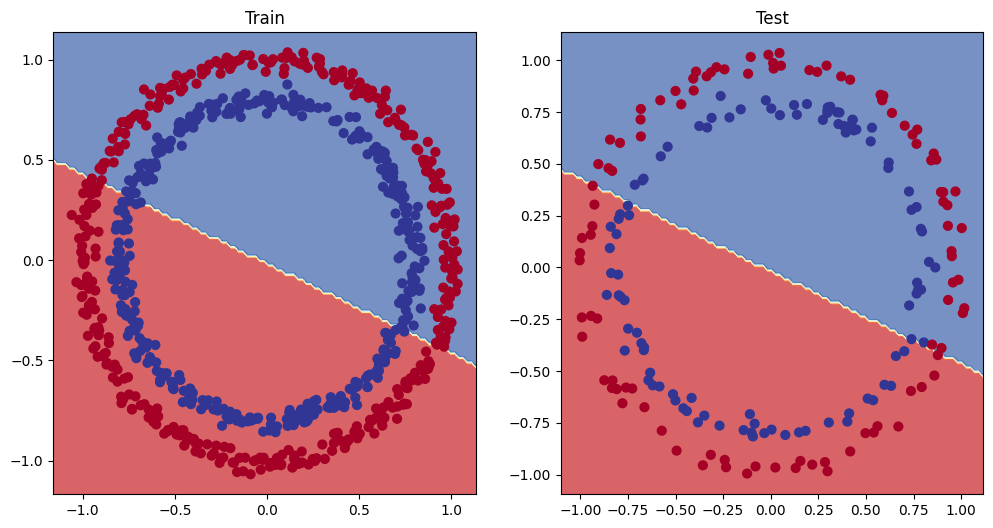

In [45]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [46]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula (w/o epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [47]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

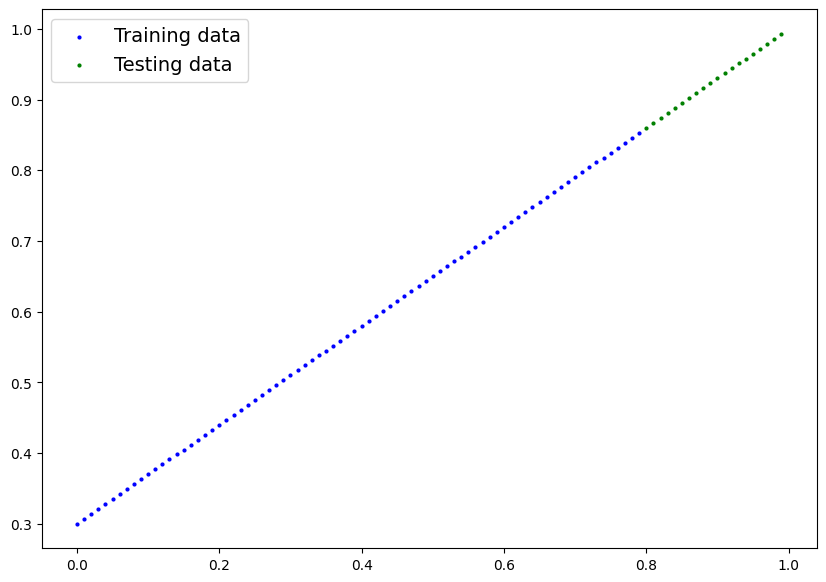

In [48]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression);

In [49]:
# Same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [50]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [51]:
# Train the model
# torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.16345 | Test loss: 0.37487
Epoch: 100 | Loss: 0.03108 | Test loss: 0.03124
Epoch: 200 | Loss: 0.04690 | Test loss: 0.00595
Epoch: 300 | Loss: 0.04021 | Test loss: 0.00778
Epoch: 400 | Loss: 0.03810 | Test loss: 0.00763
Epoch: 500 | Loss: 0.03802 | Test loss: 0.00763
Epoch: 600 | Loss: 0.03507 | Test loss: 0.00584
Epoch: 700 | Loss: 0.03296 | Test loss: 0.00678
Epoch: 800 | Loss: 0.03147 | Test loss: 0.00655
Epoch: 900 | Loss: 0.03119 | Test loss: 0.00659


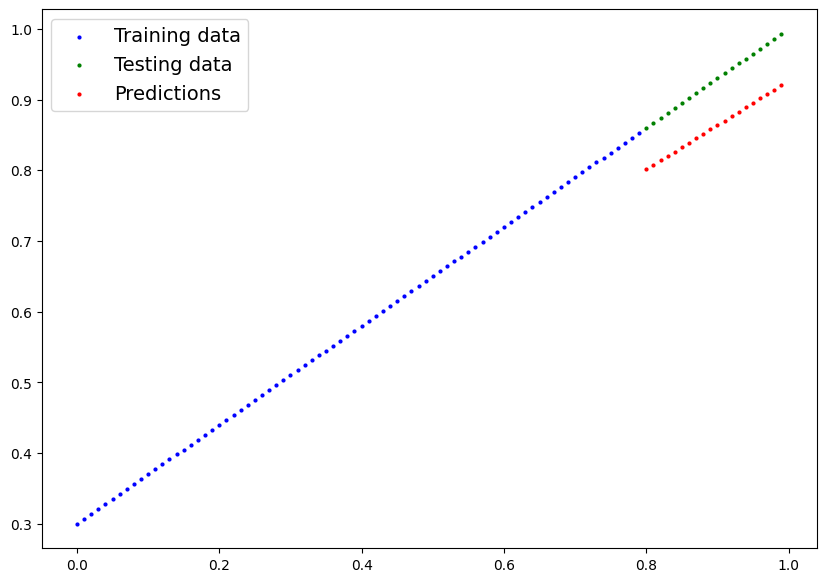

In [52]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

## 6. The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in ML terms, an infinite (but really it is finite) of linear and non-linear functions?

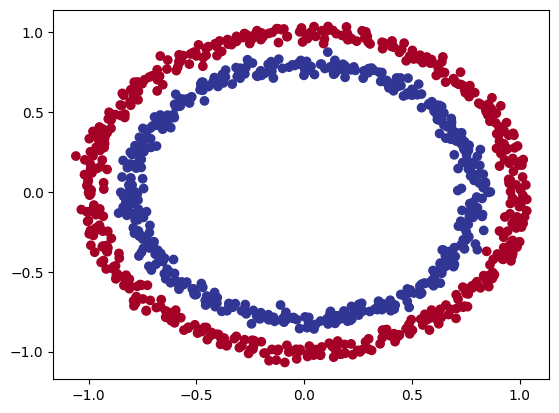

In [53]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [54]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

In [55]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation function

  def forward(self, x):
    # Where should we put our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [56]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

In [57]:
### Testing

# Random seeds
# torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs = 1000

for epoch in range(epochs):
  ### Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probs -> pred labels

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (takes in logits as first input)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.6986, Acc: 50.00% | Test Loss: 0.6969, Test Acc: 50.00%
Epoch: 100 | Loss: 0.6908, Acc: 59.50% | Test Loss: 0.6920, Test Acc: 54.50%
Epoch: 200 | Loss: 0.6870, Acc: 60.00% | Test Loss: 0.6896, Test Acc: 54.50%
Epoch: 300 | Loss: 0.6819, Acc: 61.75% | Test Loss: 0.6859, Test Acc: 55.00%
Epoch: 400 | Loss: 0.6742, Acc: 66.12% | Test Loss: 0.6799, Test Acc: 59.50%
Epoch: 500 | Loss: 0.6615, Acc: 74.12% | Test Loss: 0.6694, Test Acc: 68.50%
Epoch: 600 | Loss: 0.6391, Acc: 81.25% | Test Loss: 0.6495, Test Acc: 76.50%
Epoch: 700 | Loss: 0.5977, Acc: 89.88% | Test Loss: 0.6127, Test Acc: 85.50%
Epoch: 800 | Loss: 0.5221, Acc: 95.62% | Test Loss: 0.5452, Test Acc: 93.00%
Epoch: 900 | Loss: 0.4033, Acc: 98.75% | Test Loss: 0.4386, Test Acc: 95.50%


In [58]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

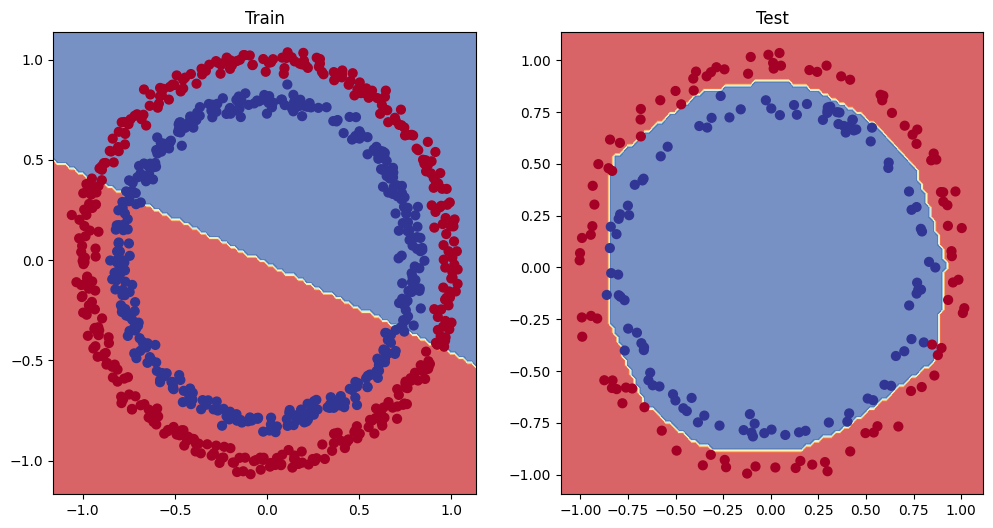

In [59]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

#7. Replicating non-linear activation functions

In [60]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [61]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

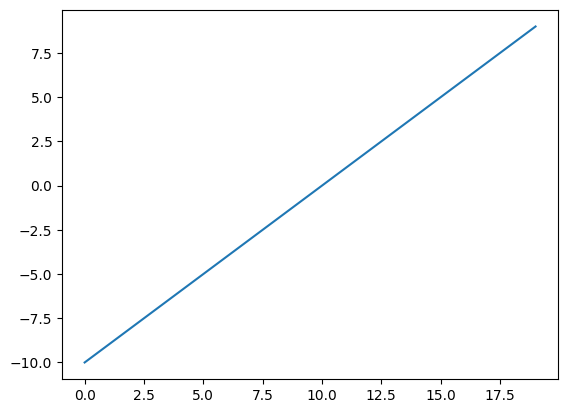

In [62]:
# Visualize the tensor
plt.plot(A);

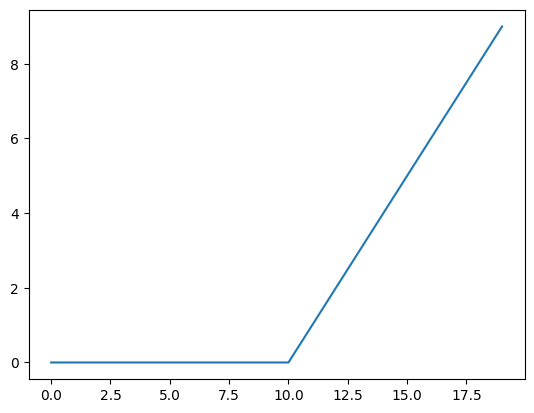

In [63]:
plt.plot(torch.relu(A));

In [64]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [65]:
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

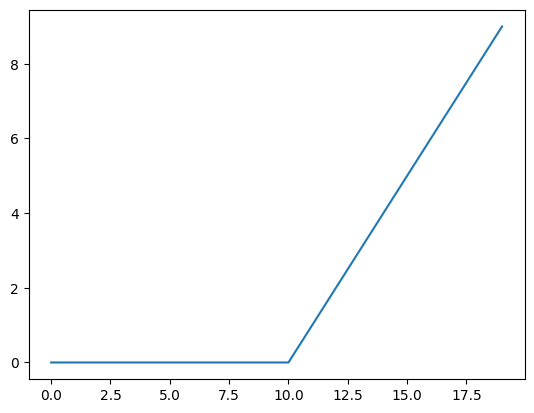

In [66]:
# Plot ReLU activation function
plt.plot(relu(A));

In [67]:
# Now let's do the same for sigmoid
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

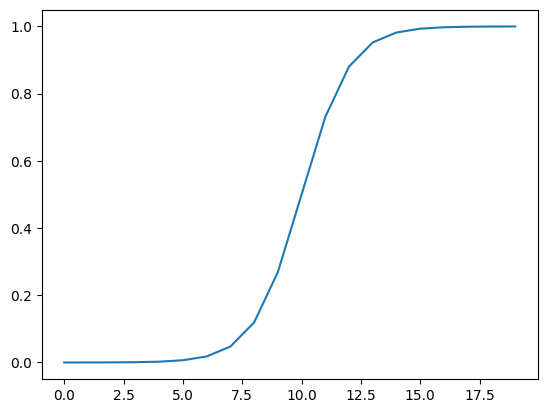

In [68]:
plt.plot(torch.sigmoid(A));

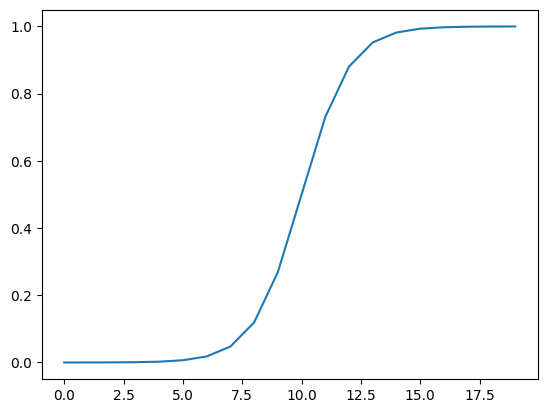

In [69]:
plt.plot(sigmoid(A));

## 8. Putting it all together with multi-class classification

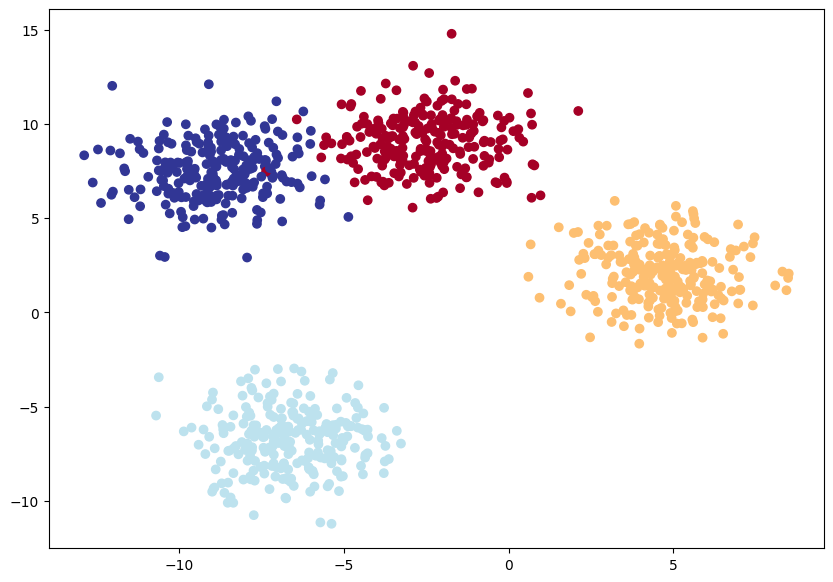

In [70]:
# Import dependencies
import torch
import matplotlib.pyplot as pt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give the clusters a little shake up
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data (visualize, visualize, visualize)
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [71]:
# Create device agnistic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [72]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """ Initializes muticlass classification model.
    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of output features (of output classes)
      hidden_units (int): Number of hidden units between layers, default 8
    Returns:

    Example:
    """

    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        # nn.ReLu(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [73]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [74]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [75]:
# Create a Loss function for multi-class classification - Loss function measures how wrong our model's predictions are
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification - optimizer updates our model parameters to try and reduce the loss
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1) # Learning rate is a hyperparameter you can change

In [76]:
# Let's get some raw outputs of our model (Logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.9411,  1.2998, -0.3486, -0.9399],
        [-2.3879,  0.3269,  1.2541, -0.3854],
        [ 1.9867, -3.1029,  1.4127,  1.6714],
        [-0.0397,  0.3600, -0.1329, -0.3795],
        [-2.8730,  2.1091,  0.1354, -1.4348],
        [-2.7782,  0.3531,  1.4598, -0.4050],
        [ 2.3121, -3.0578,  1.1888,  1.6485],
        [-2.6656,  1.5782,  0.4322, -1.1216],
        [ 1.7152, -3.3826,  1.7898,  1.8323],
        [-2.6888,  1.7324,  0.3246, -1.2121]], device='cuda:0')

In [77]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [78]:
# Convert our model's Logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.9411,  1.2998, -0.3486, -0.9399],
        [-2.3879,  0.3269,  1.2541, -0.3854],
        [ 1.9867, -3.1029,  1.4127,  1.6714],
        [-0.0397,  0.3600, -0.1329, -0.3795],
        [-2.8730,  2.1091,  0.1354, -1.4348]], device='cuda:0')
tensor([[0.0757, 0.7116, 0.1369, 0.0758],
        [0.0162, 0.2449, 0.6188, 0.1201],
        [0.4350, 0.0027, 0.2450, 0.3173],
        [0.2431, 0.3625, 0.2214, 0.1730],
        [0.0058, 0.8513, 0.1183, 0.0246]], device='cuda:0')


In [79]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [80]:
torch.max(y_pred_probs[0])

tensor(0.7116, device='cuda:0')

In [81]:
torch.argmax(y_pred_probs[0])

tensor(1, device='cuda:0')

In [82]:
# Convert our model's pred probabilities to pred labels
y_pred = torch.argmax(y_pred_probs, dim=1)
y_pred

tensor([1, 2, 0, 1, 1, 2, 0, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0,
        0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1,
        1, 2, 1, 1, 1, 0, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2,
        2, 2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 3, 2, 2, 1, 2, 2, 2,
        1, 1, 2, 0, 1, 1, 2, 1, 0, 2, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2,
        0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2,
        0, 2, 1, 2, 1, 2, 0, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 1, 2, 0, 1,
        0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 1, 1, 0, 3, 1, 1,
        1, 2, 0, 1, 2, 1, 0, 1], device='cuda:0')

In [83]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [84]:
y_blob_train.dtype

torch.int64

In [85]:
# Fit the multi-class model to the data
# torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  ### Training
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds)

  # Print out what's happenin'
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 2.2142, Acc: 29.75% | Test loss: 0.9250, Test acc: 74.50%
Epoch: 10 | Loss: 0.1534, Acc: 98.75% | Test loss: 0.1363, Test acc: 99.00%
Epoch: 20 | Loss: 0.0858, Acc: 98.88% | Test loss: 0.0774, Test acc: 99.50%
Epoch: 30 | Loss: 0.0635, Acc: 98.88% | Test loss: 0.0559, Test acc: 99.50%
Epoch: 40 | Loss: 0.0527, Acc: 98.88% | Test loss: 0.0452, Test acc: 99.50%
Epoch: 50 | Loss: 0.0465, Acc: 98.88% | Test loss: 0.0388, Test acc: 99.50%
Epoch: 60 | Loss: 0.0424, Acc: 98.88% | Test loss: 0.0345, Test acc: 99.50%
Epoch: 70 | Loss: 0.0397, Acc: 99.00% | Test loss: 0.0315, Test acc: 99.50%
Epoch: 80 | Loss: 0.0376, Acc: 99.00% | Test loss: 0.0293, Test acc: 99.50%
Epoch: 90 | Loss: 0.0361, Acc: 99.00% | Test loss: 0.0276, Test acc: 99.50%


In [86]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  5.4285,  11.1156, -11.0111,  -7.4408],
        [  2.0459, -14.2321,   0.2686,   7.8671],
        [ -9.9004, -16.8328,  19.8445,  11.0877],
        [  2.1558,   7.6809,  -5.0137,  -4.9662],
        [  8.2491,   3.4903, -13.7126,  -3.3818],
        [  2.1378, -17.4812,   0.8800,   9.7546],
        [ -9.7442, -13.2934,  18.7715,   8.9951],
        [  6.4012,  -1.2131,  -9.6819,  -0.3677],
        [-10.8730, -22.7979,  22.7794,  14.7152],
        [  6.9377,   0.4920, -10.9313,  -1.4414]], device='cuda:0')

In [87]:
# Go from Logits -> Pred Probs
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[3.3780e-03, 9.9662e-01, 2.4494e-10, 8.7013e-09],
        [2.9537e-03, 2.5173e-10, 4.9946e-04, 9.9655e-01],
        [1.2076e-13, 1.1781e-16, 9.9984e-01, 1.5736e-04],
        [3.9697e-03, 9.9602e-01, 3.0556e-06, 3.2040e-06],
        [9.9149e-01, 8.5030e-03, 2.8736e-10, 8.8115e-06],
        [4.9179e-04, 1.4837e-12, 1.3981e-04, 9.9937e-01],
        [4.1281e-13, 1.1868e-14, 9.9994e-01, 5.6774e-05],
        [9.9836e-01, 4.9252e-04, 1.0339e-07, 1.1471e-03],
        [2.4255e-15, 1.6066e-20, 9.9969e-01, 3.1451e-04],
        [9.9819e-01, 1.5843e-03, 1.7330e-08, 2.2920e-04]], device='cuda:0')

In [88]:
# Go from Pred Probs -> Pred Labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

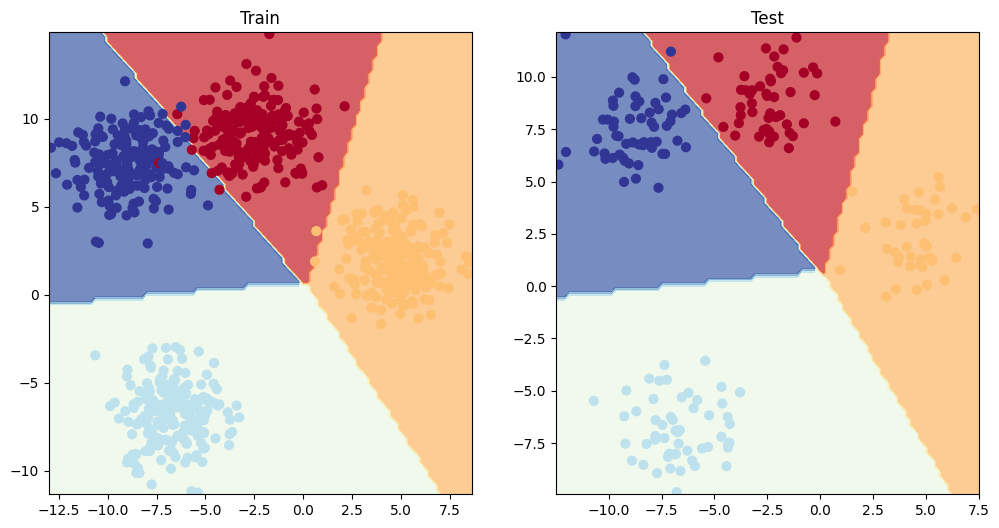

In [89]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics ...

In [90]:
!pip install torchmetrics

In [94]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy().to(device)

# Calculuate accuracy
torchmetric_accuracy(y_preds, y_blob_test)

TypeError: ignored

In [ ]:
torchmetric_accuracy.device